## Objective: To Understand how different demographic factors (e.g.,  gender, marital status) influence purchasing behavior( Purchasing Behavior Analysis). 

In [1]:
import pandas as pd #data manipulation
import numpy as np # numerical python matrix
import matplotlib.pyplot as plt # GRAPH 
import seaborn as sns 
%matplotlib inline 
from ydata_profiling import ProfileReport
from scipy.stats import skew, kurtosis
from scipy.stats import skew # Skewness

In [2]:
df = pd.read_csv("train.csv") # first read the data file 

In [3]:
df.head() # quick look to dataset . show  first 5 data row as default 

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN      1422  
3                14.0                 NaN      1057  
4                 NaN                 NaN      7969

In [5]:
df.tail() #  show last five data row as default . 

User_ID Product_ID Gender    Age  Occupation City_Category  \
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
550063                          1               1                  20   
550064                          3               0                  20   
550065                         4+               1                  20   
550066                          2               0                  20   
550067                         4+               1                  20   

        Product_Category_2  Product_Category_3  Purchase  
550063                 NaN                 NaN       368  
550064                 NaN                 NaN       371  
550065                 NaN                 NaN       137  
550066                 NaN                 NaN       365  
550067                 NaN                 NaN       490

In [6]:
df.shape #  show total rows and columns present in the dataset. 

(550068, 12)

We have 550068 rows of data and 12 columns
550068*12 = 6600816 no of data points(cells).

In [7]:
df.describe() # it prints summary statistics.

User_ID     Occupation  Marital_Status  Product_Category_1  \
count  5.500680e+05  550068.000000   550068.000000       550068.000000   
mean   1.003029e+06       8.076707        0.409653            5.404270   
std    1.727592e+03       6.522660        0.491770            3.936211   
min    1.000001e+06       0.000000        0.000000            1.000000   
25%    1.001516e+06       2.000000        0.000000            1.000000   
50%    1.003077e+06       7.000000        0.000000            5.000000   
75%    1.004478e+06      14.000000        1.000000            8.000000   
max    1.006040e+06      20.000000        1.000000           20.000000   

       Product_Category_2  Product_Category_3       Purchase  
count       376430.000000       166821.000000  550068.000000  
mean             9.842329           12.668243    9263.968713  
std              5.086590            4.125338    5023.065394  
min              2.000000            3.000000      12.000000  
25%              5.000000            9.000000    5823.000000  
50%              9.000000           14.000000    8047.000000  
75%             15.000000           16.000000   12054.000000  
max             18.000000           18.000000   23961.000000

In [7]:
# Marital status average - 0.40(<0.5 , I can say unmarried are more in average)
# Purchase avg - 9264 on average people spend amount 9264.
# Max purchase - 23961
# Min Purchase - 12

In [8]:
df.info()   #the complete information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


Data type - 5 interger, 2 float, 5 object .


In [9]:
print(df.isnull().values.sum()) 

556885


In [10]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [11]:
# Replace the ' 's with NaN
df = df.replace(" ",np.NaN)

In [12]:
# Count the number of NaNs in the dataset to verify
print(df.isnull().values.sum())

556885


In [13]:
df['Gender'].value_counts()

Gender
M    414259
F    135809
Name: count, dtype: int64

In [14]:
profile = ProfileReport(df,title="train.csv")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

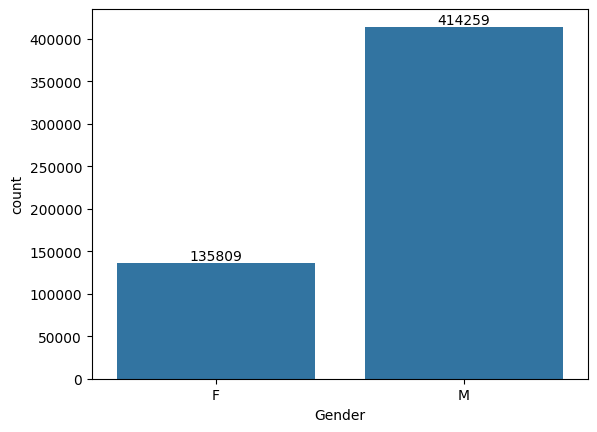

In [15]:
ax = sns.countplot(x="Gender",data=df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Purchase', ylabel='Count'>

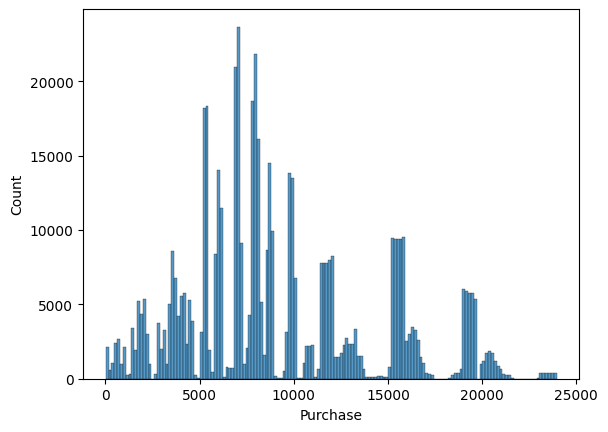

In [13]:
sns.histplot(data=df, x= "Purchase")


<Axes: xlabel='Purchase', ylabel='Count'>

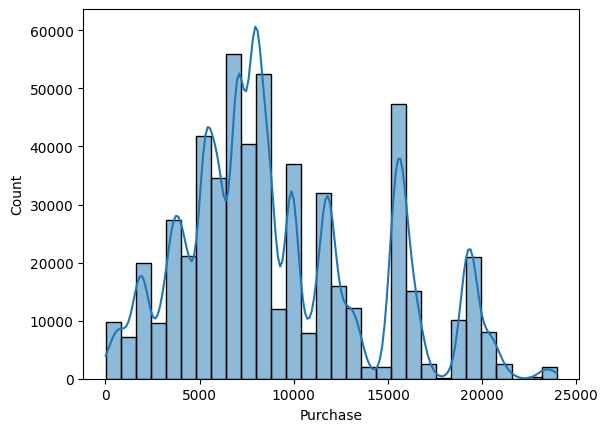

In [14]:
sns.histplot(data=df, x= "Purchase" , kde= True, bins= 30)


# Type of Plot: Histogram with an overlaid density curve.

# Data: The plot represents the distribution of purchase amounts.
# Shape: The distribution is multimodal, indicating multiple peaks in the data. This suggests that there might be distinct groups of customers with different purchasing behaviors.
# Skewness: The distribution appears to be slightly right-skewed, meaning there are a few extremely high purchase amounts that pull the tail of the distribution to thghts.e ri
# Purchase values span from approximately 0 to 25,000 u.ght.

In [15]:
# Calculate skewness
purchase_skewness = skew(df['Purchase'])
print(f'Skewness of Purchase: {purchase_skewness}')

# Calculate kurtosis
purchase_kurtosis = kurtosis(df['Purchase'])
print(f'Kurtosis of Purchase: {purchase_kurtosis}')

Skewness of Purchase: 0.6001383671643447
Kurtosis of Purchase: -0.3383853975360749


# Skweness shows 0.60, which measns my data is 0.60 unit away from normal disrubution.It is moderately skewed to the right, suggesting that there are some higher purchase amounts that are pulling the mean to the right..# A kurtosis of approximately -0.34 indicates that the distribution is platykurtic, meaning it has lighter tails and a flatter peak compared to a normal distribution.

In [16]:

# Assuming 'df' is your DataFrame and it is already loaded
sns.set(style="whitegrid")  # Setting the theme

# Creating the scatterplot
plt.figure(figsize=(10, 6))  # Adjusting the figure size
scatter = sns.scatterplot(data=df, y='Purchase', x='Marital_Status', s=100, color="blue", edgecolor="w", linewidth=1.5)

# Customizing the plot
scatter.set_title("Scatterplot of Purchase vs Marital_Status", fontsize=16)
scatter.set_xlabel("Marital_Status", fontsize=14)
scatter.set_ylabel("Purchase", fontsize=14)
plt.tight_layout()

# Displaying the plot
plt.show()

The data points are clustered tightly within two vertical bands, with no discernible pattern or trend.

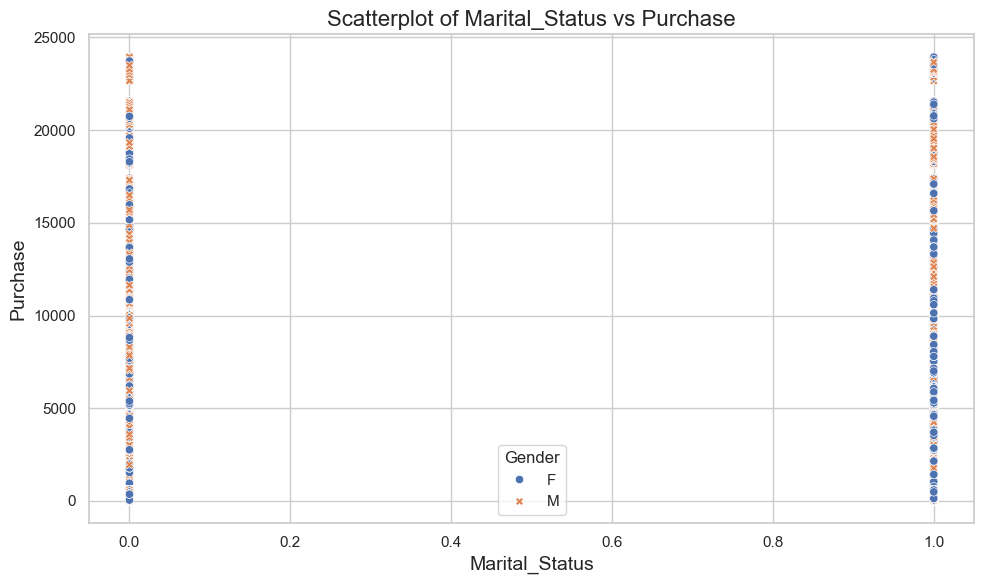

In [17]:

sns.set(style="whitegrid")  # Setting the theme

# Creating the scatterplot
plt.figure(figsize=(10, 6))  # Adjusting the figure size
scatter = sns.scatterplot(data=df, y="Purchase", x="Marital_Status", hue="Gender", style="Gender", palette="deep")

# Customizing the plot
scatter.set_title("Scatterplot of Marital_Status vs Purchase", fontsize=16)
scatter.set_xlabel("Marital_Status", fontsize=14)
scatter.set_ylabel("Purchase", fontsize=14)
plt.legend(title='Gender', loc='best')
plt.tight_layout()

# Displaying the plot
plt.show()




# The scater plot shows that the female purchase more than males . 
# Purchasing is highest in Married people
# In the relationship between Age and Purchase amount, Both genders (Female and Male) are represented across all age groups.

C:\Users\L E N O V O\AppData\Local\Temp\ipykernel_24572\1706645213.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Purchase', data=df, palette='deep')


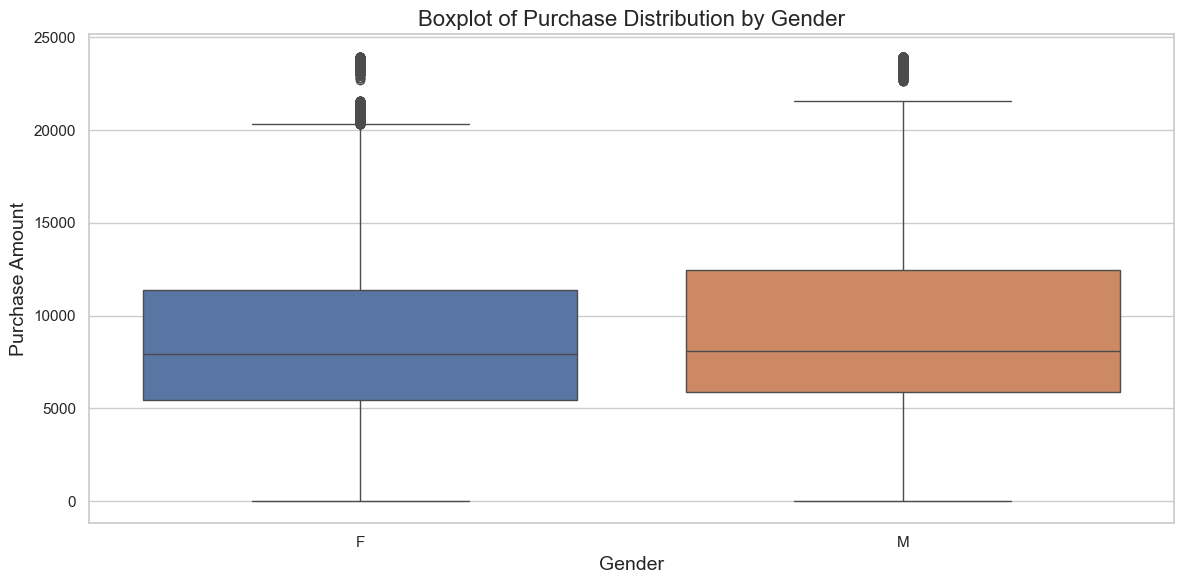

In [18]:

# Analyzing purchase distribution by gender
plt.figure(figsize=(12, 6))

# Creating a boxplot for Purchase distribution by Gender
sns.boxplot(x='Gender', y='Purchase', data=df, palette='deep')

# Customizing the plot
plt.title('Boxplot of Purchase Distribution by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Purchase Amount', fontsize=14)
plt.tight_layout()

plt.savefig('purchase_distribution_by_gender.png')
plt.show()

# The box for males is slightly wider than that for females, suggesting a larger spread in purchase amounts among male.
# There are several outliers, both for males and females, indicating that there are some customers with significantly higher purchase amounts compared to the majority.
# Generally, male customers tend to spend more than female, as evidenced by the higher median and overall distribution of the boxplot for males.

In [20]:
# Creating the line plot
plt.figure(figsize=(12, 8))  # Adjusting the figure size
line_plot = sns.lineplot(y='Purchase', x='Marital_Status', data=df, marker='o', color='blue', linewidth=2.5)

# Customizing the plot
line_plot.set_title("Line Plot of Marital_Status vs Purchase", fontsize=20, weight='bold')
line_plot.set_xlabel("Marital_Status", fontsize=16)
line_plot.set_ylabel("Purchase", fontsize=16)
line_plot.tick_params(labelsize=14)  # Adjusting tick label size
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Displaying the plot
plt.show()


# Trend: The plot shows a very slight downward trend in the Purchase amount as Marital_Status increases. However, the change is so minimal that it might not be statistically significant.
# The width of the shaded area indicate the level of confidence in the estimates; a wider area suggests more variability in purchase amounts.

In [21]:

sns.boxplot(data=df, x="Marital_Status", y="Purchase", hue="Gender")

<Axes: xlabel='Marital_Status', ylabel='Purchase'>

# The x-axis represents "Marital_Status," with 0  indicating single and 1 indicating married.# The y-axis represents "Purchase," showing the amount spent.
# The median purchase amount is slightly higher for married individuals compared to unmarried ones.
# Within each marital status category, the box plot shows both males and females.
# For both marital statuses, males tend to have slightly higher median purchase amounts compared to females.
# The spread of purchase amounts (interquartile range) is also slightly wider for males compared to females in both marital s.
# The presence of these outliers indicates that a few individuals tend to spend significantly more than the majority.
# Gender Influence: Males generally have higher purchase amounts than females, both among unmarried and married individuals.
#  married individuals tend to spend slightly more on average.


C:\Users\L E N O V O\AppData\Local\Temp\ipykernel_9656\1092021495.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=data, palette='muted')
C:\Users\L E N O V O\AppData\Local\Temp\ipykernel_9656\1092021495.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age', data=data, palette='rocket')
C:\Users\L E N O V O\AppData\Local\Temp\ipykernel_9656\1092021495.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='City_Category', data=data, palette='crest')
C:\Users\L E N O V O\AppData\Local\Temp\ipykernel_9656\1092

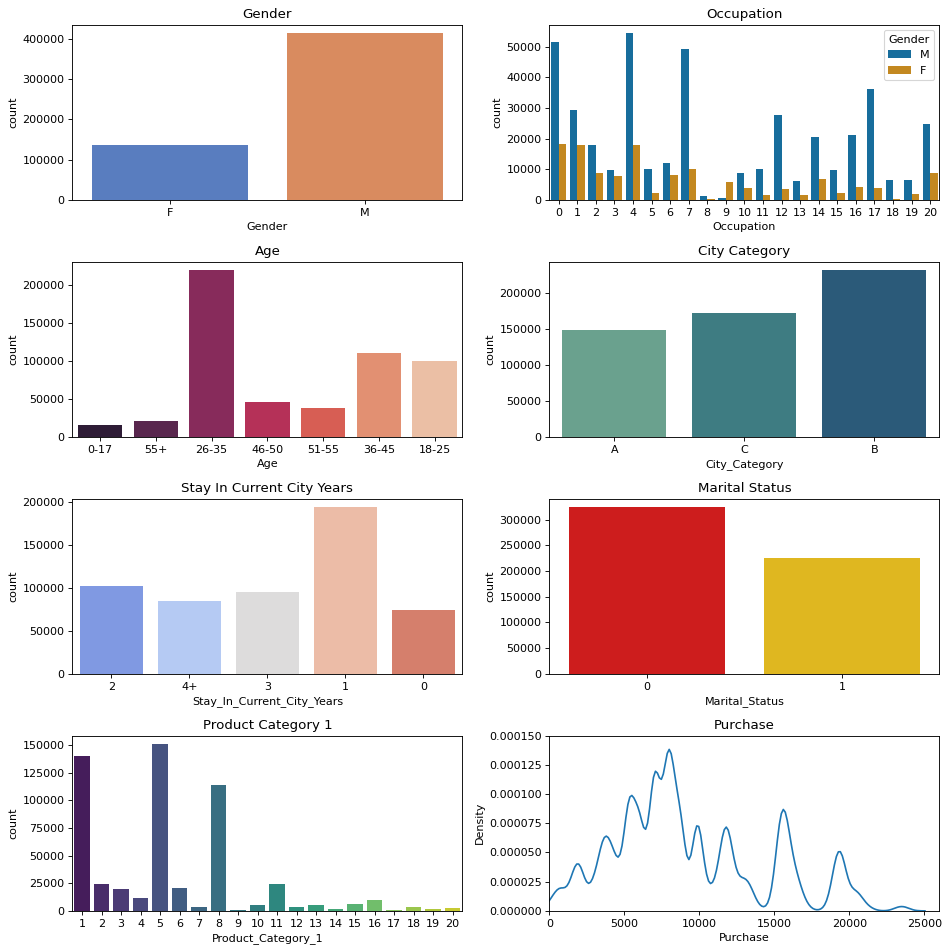

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv('train.csv')

# Now you can run your plotting code
plt.figure(figsize=(12, 12), dpi=80)

plt.subplot(4, 2, 1)
plt.title('Gender')
sns.countplot(x='Gender', data=data, palette='muted')

plt.subplot(4, 2, 2)
plt.title('Occupation')
sns.countplot(x='Occupation', hue= "Gender", data=data, palette='colorblind')

plt.subplot(4, 2, 3)
plt.title('Age')
sns.countplot(x='Age', data=data, palette='rocket')

plt.subplot(4, 2, 4)
plt.title('City Category')
sns.countplot(x='City_Category', data=data, palette='crest')

plt.subplot(4, 2, 5)
plt.title('Stay In Current City Years')
sns.countplot(x='Stay_In_Current_City_Years', data=data, palette='coolwarm')

plt.subplot(4, 2, 6)
plt.title('Marital Status')
sns.countplot(x='Marital_Status', data=data, palette='hot')

plt.subplot(4, 2, 7)
plt.title('Product Category 1')
sns.countplot(x='Product_Category_1', data=data, palette='viridis')

ax = plt.subplot(4, 2, 8)
plt.title('Purchase')
sns.kdeplot(data['Purchase'], ax=ax)
ax.set_ylim(0, 0.00015)
ax.set_xlim(0, 26000)

plt.tight_layout()
plt.show()


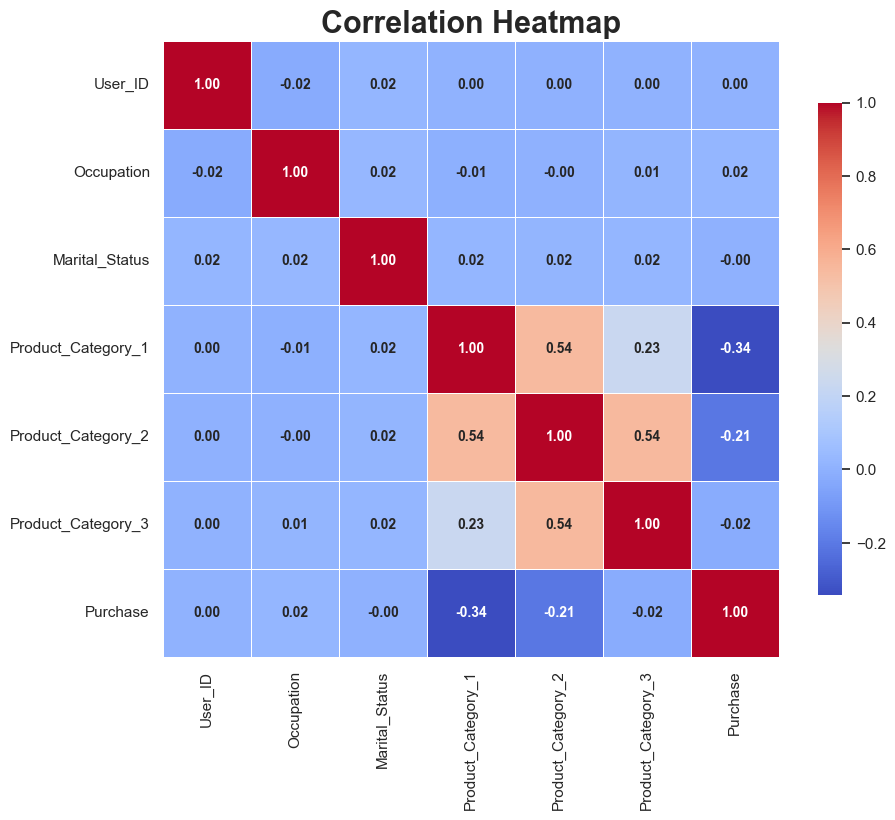

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the data
df = pd.read_csv("train.csv")

# Step 2: Select only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=[float, int])

# Step 3: Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Step 4: Plot the heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, cbar_kws={"shrink": .8}, linewidths=.5,
            annot_kws={"size": 10, "weight": "bold"})  # Customizing annotation size and weight

plt.title("Correlation Heatmap", fontsize=22, weight='bold')
plt.show()


# This heatmap shows the correlation matrix for various features in the dataset. Correlation measures the linear relationship between two variables, with values ranging from -1 to 1. 
# The heatmap's correlation between Marital_Status and Purchase is close to zero. This indicates that there is essentially no linear relationship between marital status and the purchase amount in this dataset.
# It indicates a very weak correlation.

# Data Analysis Report: Relationship Between Marital_Status and Purchasing_behaviour of Black Friday sales datasets. 
# Objective
# The primary objective of this analysis is to examine the relationship between Marital_Status and Purchasing_behaviour during Black friday sells.
## Data Overview
- **Total Data Points**: 6600816
- **Purchase average**Marital status average - 0.40(<0.5 , I can say unmarried are more in average): .
- **Max purchase**:  23961.
  - Min Purchase - 12
 
- **Data Types**:
  - Numeric (int64): 5 columns
  - Categorical (object): 5 columns
  - String : 1
- **Gender Distribution**:
  - Females:  135809
  - Males:  414259
  - Notably, the dataset is imbalanced, with a higher representation of males.

## Data Characteristics
### Purchase Distribution
- **Skewness**: The distribution appears to be slightly right-skewed, meaning there are a few extremely high purchase amounts that pull the tail of the distribution to the rights.
Purchase values span from approximately 0 to 25,000 units.

- **Shape**: The distribution is multimodal, indicating multiple peaks in the data. This suggests that there might be distinct groups of customers with different purchasing behaviors.
- **Skweness**: Skweness shows 0.60, which measns my data is 0.60 unit away from normal disrubution.It is moderately skewed to the right, suggesting that there are some higher purchase amounts that are pulling the mean to the right.A kurtosis of approximately -0.34 indicates that the distribution is platykurtic, meaning it has lighter tails and a flatter peak compared to a normal distribution.

    ### Central Tendency
- Due to the right skewness, the mean age may not be the best representation of central tendency. The median age provides a better central value.

### Scater plot insights
- The scater plot shows that the female purchase more than males .
- Purchasing is highest in Married people.
- In the relationship between Age and Purchase amount, Both genders (Female and Male) are   represented across all age groups


### Box Plot Insights
- The box for males is slightly wider than that for females, suggesting a larger spread     in purchase amounts among male.
- There are several outliers, both for males and females, indicating that there are some    customers with significantly higher purchase amounts compared to the majority.
- Generally, male customers tend to spend more than female, as evidenced by the higher      median and overall distribution of the boxplot for males.
     

## Correlation Analysis
- **Marital_status vs Purchase**: The correlation between Marital_Status and Purchase is close to zero. This indicates that there is essentially no linear relationship between marital status and the purchase amount in this dataset.
- **Marital_status vs Product_categories**: The analysis shows that there is no significant relationship between marital status and the choice of products across categories 1, 2, and 3. The weak positive correlations suggest that marital status does not play a major role in influencing the types of products purchased.
- ** **: 

## Conclusion
The analysis concludes that marital status does not significantly influence purchasing behavior in terms of the amount spent or the choice of product categories during Black Friday sales. This suggests that marketing strategies and sales promotions need not heavily differentiate between married and unmarried customers. Instead, focusing on other demographic factors and customer segments may yield better-targeted marketing efforts and improved sales outcomes.

